In [1]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#from learntools.time_series.style import *


In [2]:
pip install learntools

ERROR: Could not find a version that satisfies the requirement learntools (from versions: none)
ERROR: No matching distribution found for learntools
Note: you may need to restart the kernel to use updated packages.


In [3]:
#reading data from csv

In [4]:
temperatures = pd.read_csv('/Users/nikhilgande/Documents/pdsassignment1/climate_change/data_clean/GlobalTemperatures.csv')

In [5]:
temperatures.head()


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


print(temperatures.shape[0])

In [5]:
print(temperatures.shape[0])

3192


In [6]:
temperatures.isnull().sum()
df=temperatures
dfresult = df.dropna(subset=['LandAverageTemperature'])
dfresult.isnull().sum()
print(dfresult.shape[0])



3180


In [7]:
max(temperatures.dt)


'2015-12-01'

In [8]:
temperatures.describe()


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [ ]:
#extracting data from existing column and creating new columns

In [9]:
temperatures['Date'] = pd.to_datetime(temperatures.dt, format='%Y-%d-%m')
temperatures['Year'] = temperatures['Date'].dt.year
temperatures['Date'] = temperatures['Date'].map(dt.datetime.toordinal)


In [10]:
temperatures.dtypes
temperatures.head()
temperatures.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
Date                                            0
Year                                            0
dtype: int64

In [11]:
temperatures.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
Date                                            0
Year                                            0
dtype: int64

In [ ]:
#grouping the data by year with mean

In [12]:
df = temperatures.groupby('Year')['LandAverageTemperature'].mean().reset_index()


In [13]:
print(df.head())

   Year  LandAverageTemperature
0  1750                8.719364
1  1751                7.976143
2  1752                5.779833
3  1753                8.388083
4  1754                8.469333


In [ ]:
#finding the corellation to observe the realation between dependent and independent vaiables

In [14]:
corr, p = pearsonr(df['Year'], df['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))


Pearson correlation of Year and Land Average Temperature: 0.6223364823755805


In [15]:
X = df['Year']
y = df['LandAverageTemperature']

#X = X.values.reshape(-1,1)

In [16]:
print(X)

0      1750
1      1751
2      1752
3      1753
4      1754
       ... 
261    2011
262    2012
263    2013
264    2014
265    2015
Name: Year, Length: 266, dtype: int64


In [17]:
X = X.values.reshape(-1,1)

In [18]:
print(X)

[[1750]
 [1751]
 [1752]
 [1753]
 [1754]
 [1755]
 [1756]
 [1757]
 [1758]
 [1759]
 [1760]
 [1761]
 [1762]
 [1763]
 [1764]
 [1765]
 [1766]
 [1767]
 [1768]
 [1769]
 [1770]
 [1771]
 [1772]
 [1773]
 [1774]
 [1775]
 [1776]
 [1777]
 [1778]
 [1779]
 [1780]
 [1781]
 [1782]
 [1783]
 [1784]
 [1785]
 [1786]
 [1787]
 [1788]
 [1789]
 [1790]
 [1791]
 [1792]
 [1793]
 [1794]
 [1795]
 [1796]
 [1797]
 [1798]
 [1799]
 [1800]
 [1801]
 [1802]
 [1803]
 [1804]
 [1805]
 [1806]
 [1807]
 [1808]
 [1809]
 [1810]
 [1811]
 [1812]
 [1813]
 [1814]
 [1815]
 [1816]
 [1817]
 [1818]
 [1819]
 [1820]
 [1821]
 [1822]
 [1823]
 [1824]
 [1825]
 [1826]
 [1827]
 [1828]
 [1829]
 [1830]
 [1831]
 [1832]
 [1833]
 [1834]
 [1835]
 [1836]
 [1837]
 [1838]
 [1839]
 [1840]
 [1841]
 [1842]
 [1843]
 [1844]
 [1845]
 [1846]
 [1847]
 [1848]
 [1849]
 [1850]
 [1851]
 [1852]
 [1853]
 [1854]
 [1855]
 [1856]
 [1857]
 [1858]
 [1859]
 [1860]
 [1861]
 [1862]
 [1863]
 [1864]
 [1865]
 [1866]
 [1867]
 [1868]
 [1869]
 [1870]
 [1871]
 [1872]
 [1873]
 [1874]


In [ ]:
#drawing scatter plot for data points to observe pattern

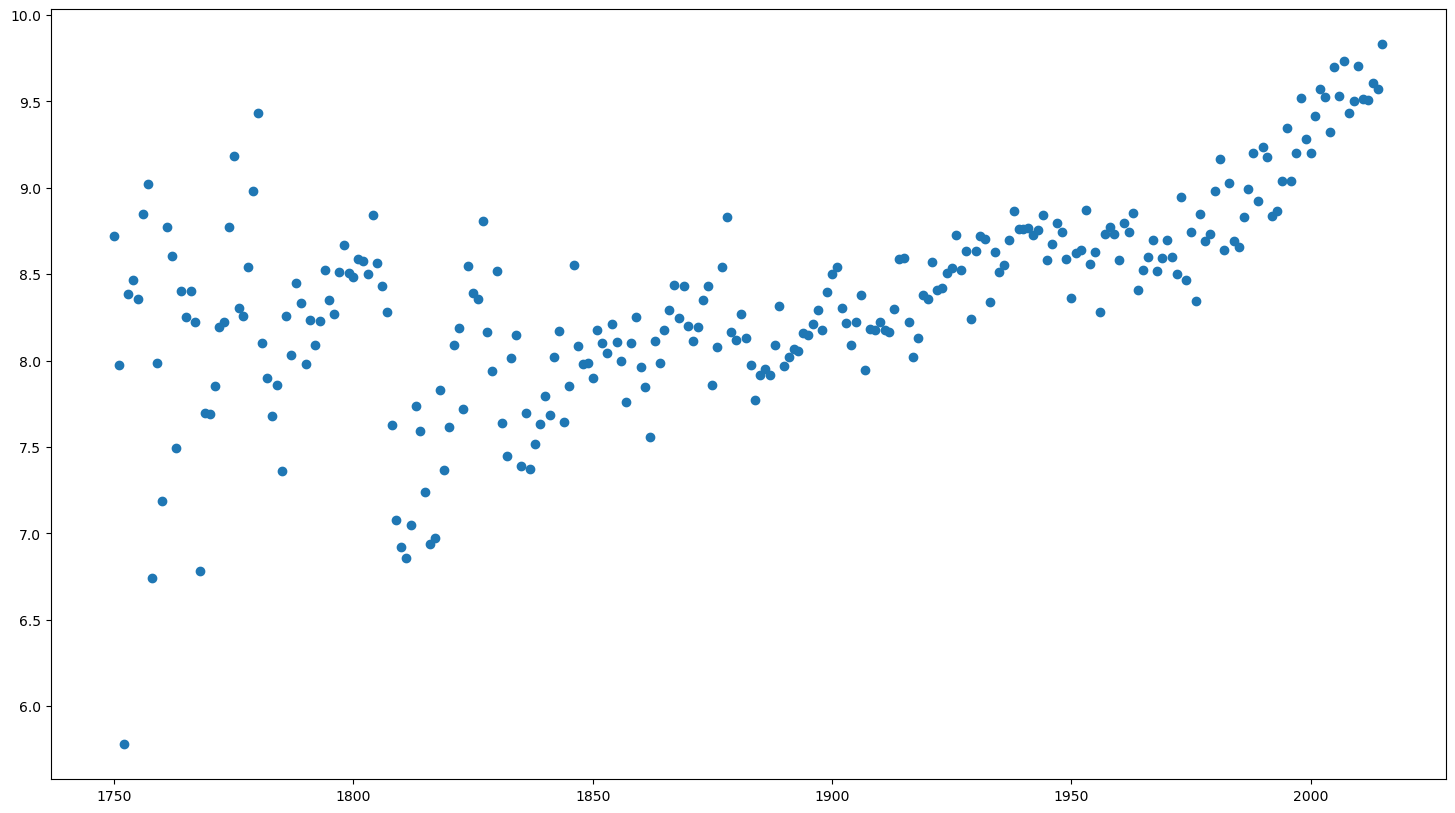

In [19]:
plt.figure(figsize=(18,10))
plt.scatter(data = df, x = 'Year',y = 'LandAverageTemperature')
plt.show()


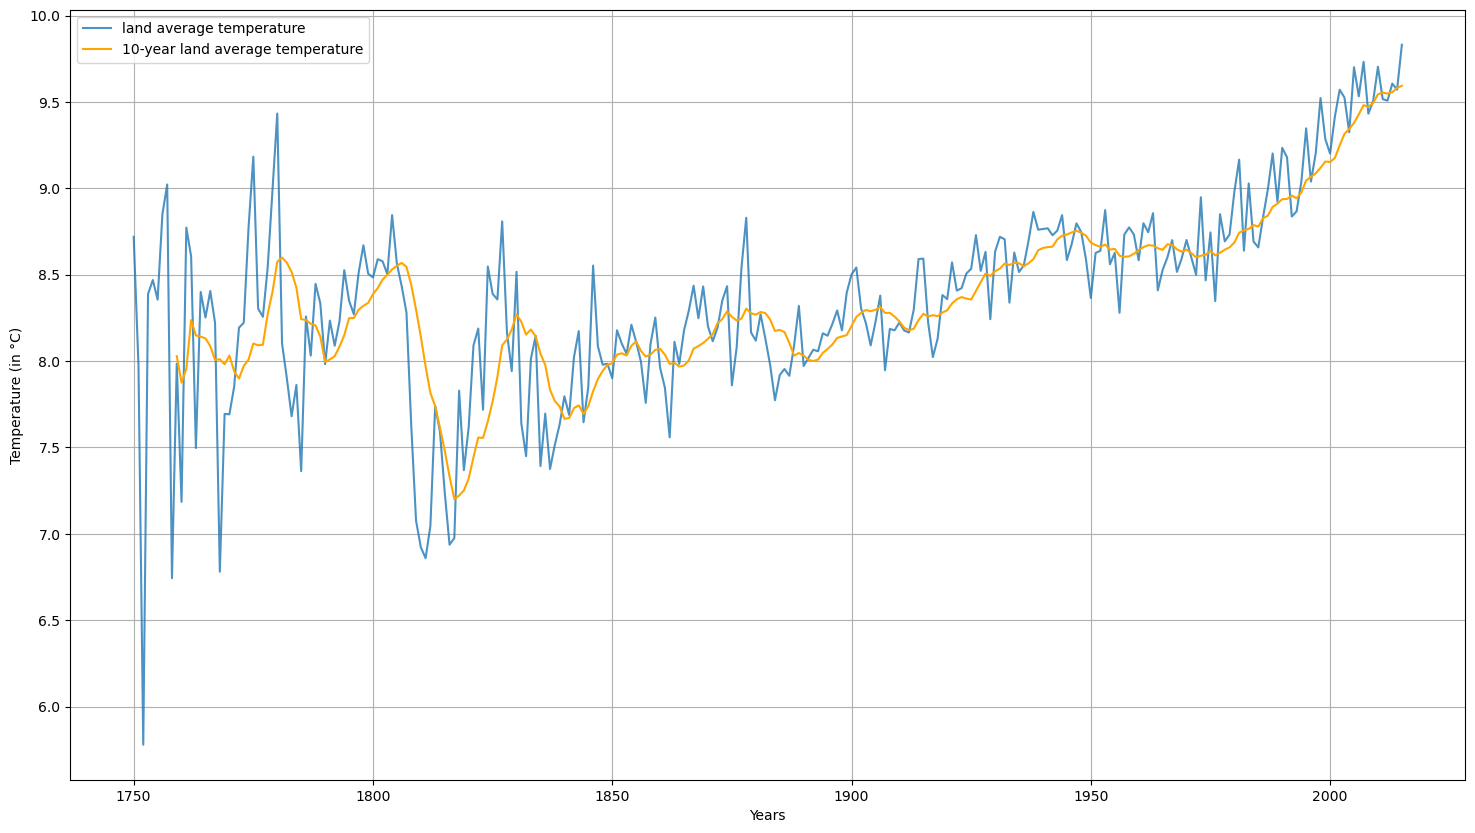

<Figure size 640x480 with 0 Axes>

In [20]:
temperature_px = df['LandAverageTemperature']
df['10'] = temperature_px.rolling(window=10).mean()

plt.figure(figsize=(18,10))
ax = plt.subplot()
ax.plot(df['LandAverageTemperature'], alpha=0.8, label='land average temperature')
ax.plot(df['10'], color="orange", label='10-year land average temperature')
ax.set_xticks([0,50,100,150,200,250])
ax.set_xticklabels([1750,1800,1850,1900,1950,2000])
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.grid()
plt.legend()
plt.show()
plt.clf()


In [21]:
print(y)

0      8.719364
1      7.976143
2      5.779833
3      8.388083
4      8.469333
         ...   
261    9.516000
262    9.507333
263    9.606500
264    9.570667
265    9.831000
Name: LandAverageTemperature, Length: 266, dtype: float64


In [ ]:
#performing linear reghression

In [22]:
lr = LinearRegression()


In [23]:
lr.fit(X, y)

LinearRegression()

In [24]:
y_pred = lr.predict(X)


In [25]:
years = pd.DataFrame(X)


In [ ]:
#plotting the regression line

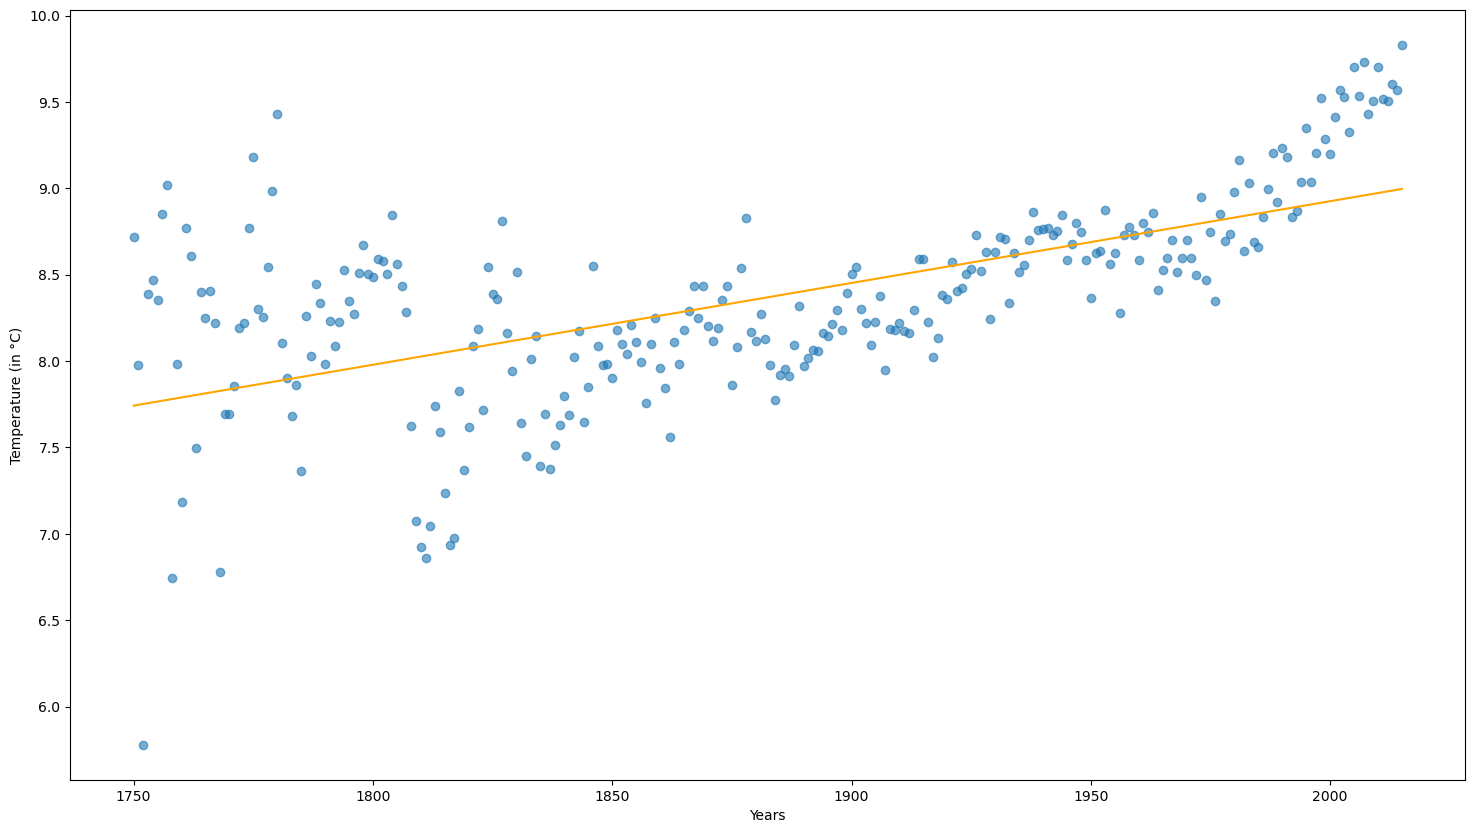

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()


In [27]:
print(lr.coef_)
print(10 * lr.coef_)


[0.00473169]
[0.04731692]


In [28]:
#1850-2015

In [29]:
corr, p = pearsonr(df[df['Year'] >= 1850]['Year'], df[df['Year'] >= 1850]['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))


Pearson correlation of Year and Land Average Temperature: 0.8656819312510893


In [30]:
lr = LinearRegression()


In [31]:
X = df[df['Year'] >= 1850]['Year']
y = df[df['Year'] >= 1850]['LandAverageTemperature']

X = X.values.reshape(-1,1)


In [32]:
lr.fit(X, y)


LinearRegression()

In [33]:
y_pred = lr.predict(X)


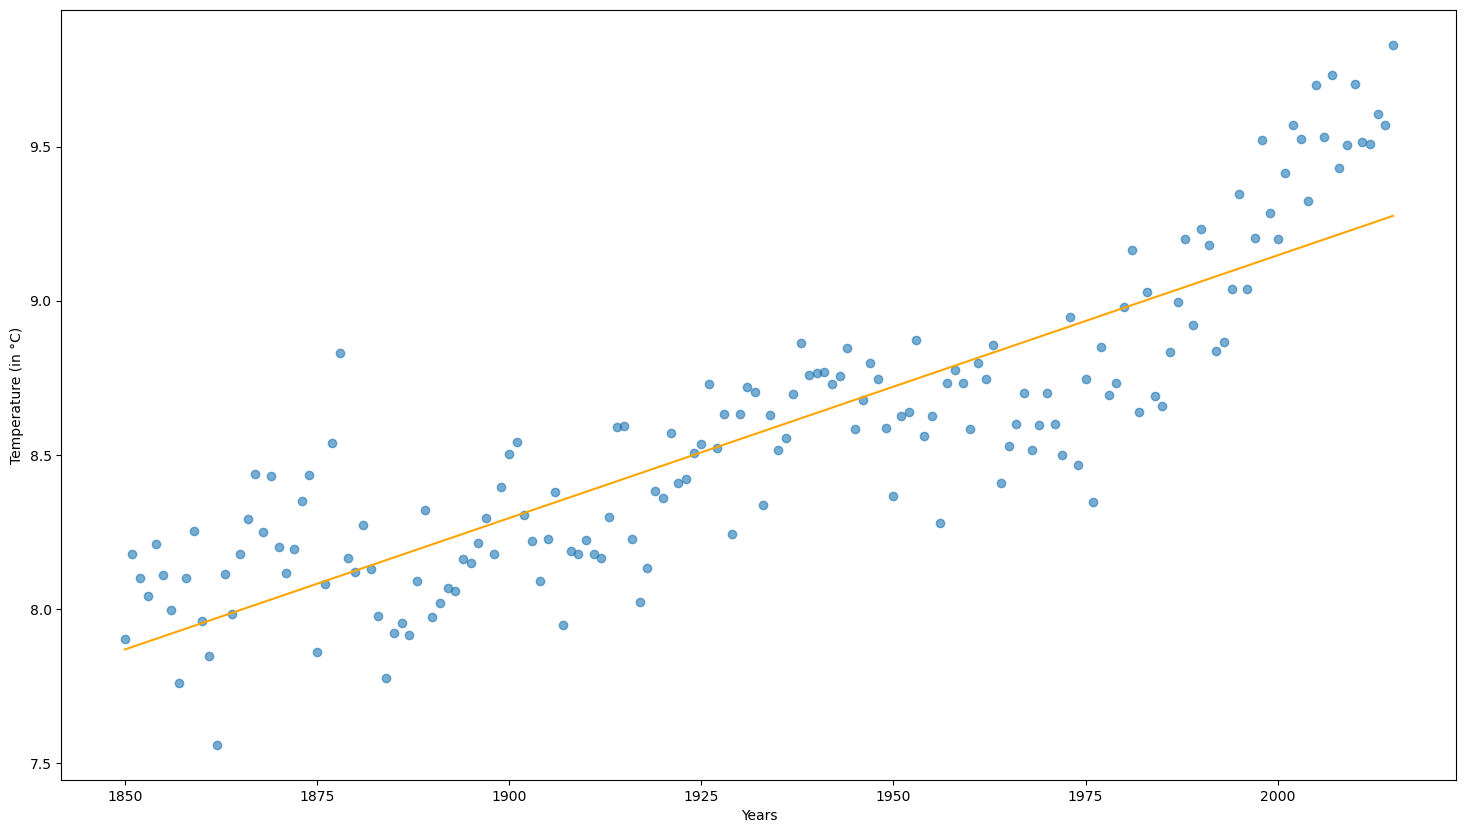

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()


In [35]:
#1950-2015

In [36]:
corr, p = pearsonr(df[df['Year'] >= 1950]['Year'], df[df['Year'] >= 1950]['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))


Pearson correlation of Year and Land Average Temperature: 0.8698038878923113


In [37]:
lr = LinearRegression()


In [38]:
X = df[df['Year'] >= 1950]['Year']
y = df[df['Year'] >= 1950]['LandAverageTemperature']

X = X.values.reshape(-1,1)


In [39]:
lr.fit(X, y)


LinearRegression()

In [40]:
y_pred = lr.predict(X)


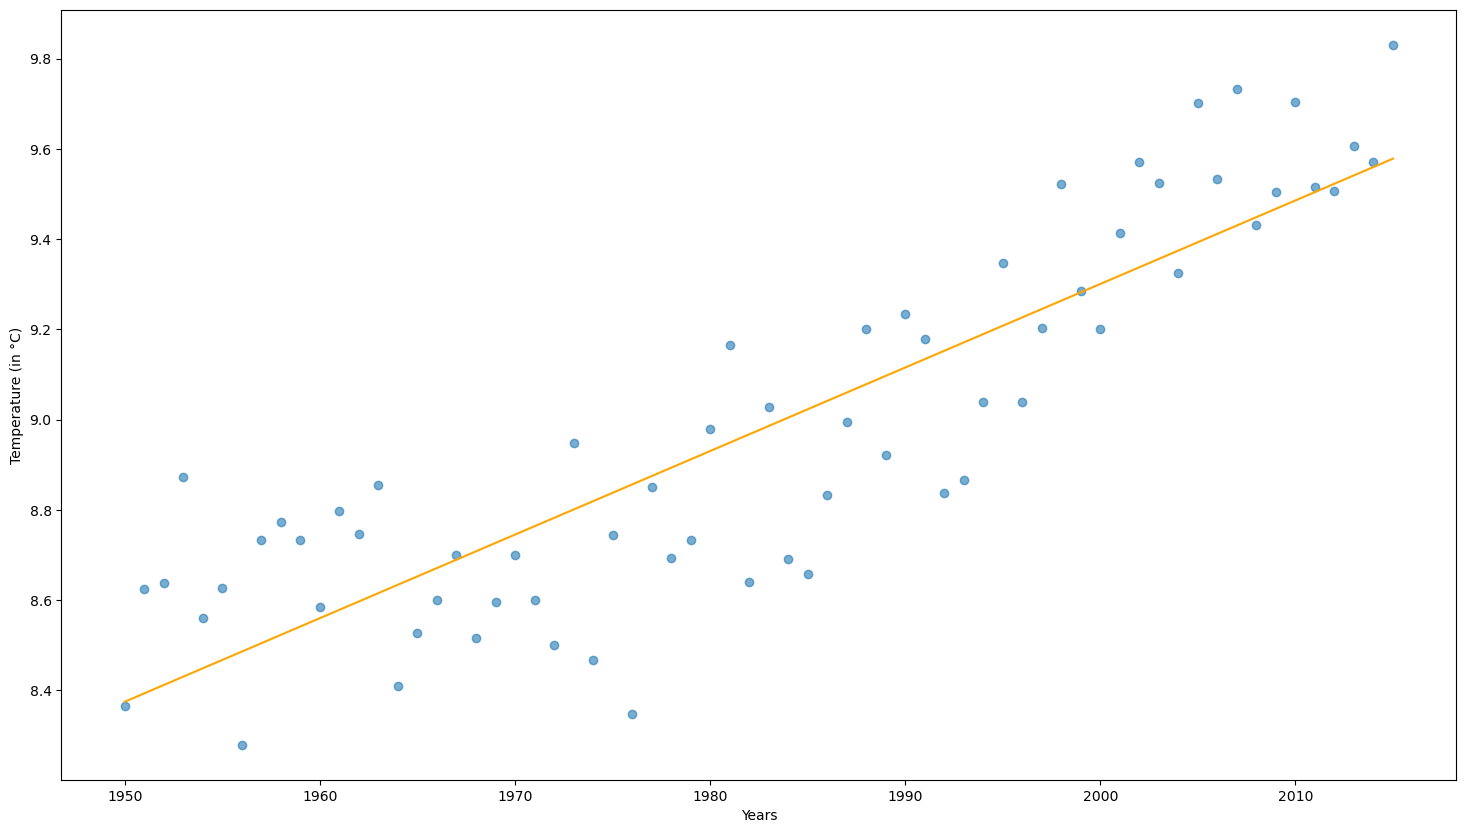

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()


In [42]:
#splitiing the data into testing and training data in the ratio 8:2

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [44]:
lr = LinearRegression()


In [45]:
#fitting the line for data points using linear regression
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
#finding the accuracy
lr.score(x_test,y_test)

0.6470517148479766

In [47]:
y_pred = lr.predict(x_test)


In [ ]:
#plotting the line for datapoints

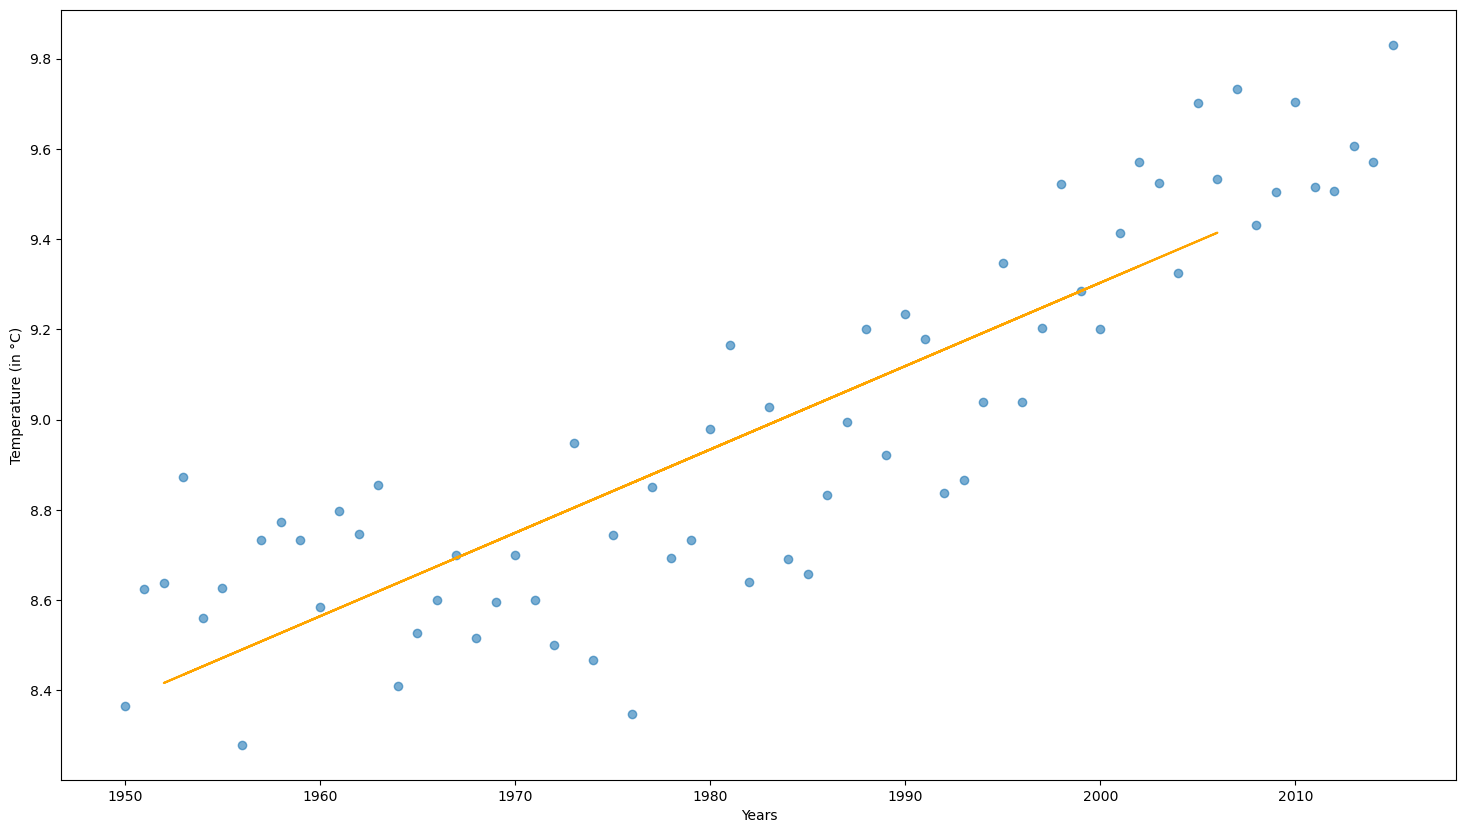

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(x_test, y_pred, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [ ]:
#importing libraries to perform support vector regression

In [49]:
from sklearn.svm import SVR
#clf = svm.SVC(kernel='linear') # Linear Kernel
svr = SVR().fit(x_test, y_test)

s=svr.score(x_test, y_test)
#printing accuracy
print(s)


0.810050908028616


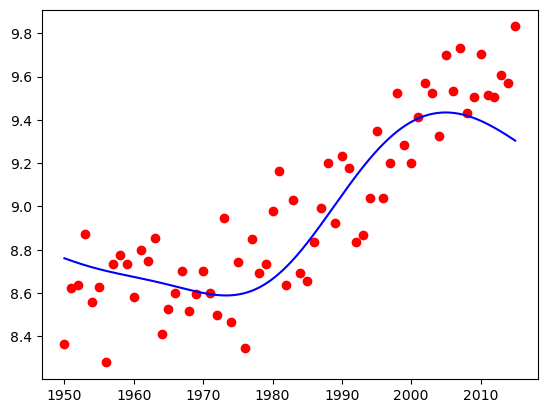

In [50]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, svr.predict(X_grid), color = 'blue')